In [1]:
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from scipy.signal import find_peaks

data_path = "../data/networks"

In [2]:
# histograph of volume of tweets in time buckets
tweet_df = pd.read_csv(data_path + "/2147762_tweets.csv")
tweet_df['article_id'] = 2147762
tweet_df['created_at']= pd.to_datetime(tweet_df['created_at'])
tweet_df.head()

,id,url_id,user_id,created_at,type,is_mention,article_id
0,1321065845850886144,None,None,2020-10-27 12:26:56+00:00,None,None,2147762
1,1321101083029213185,93234779,1157363558574886914,2020-10-27 14:46:57+00:00,origin,True,2147762
2,1321101079908679681,93234400,812841872389472257,2020-10-27 14:46:56+00:00,retweet,False,2147762
3,1321101028469727232,93234400,856756669270941696,2020-10-27 14:46:44+00:00,retweet,False,2147762
4,1321100982126841856,93234400,1219306174983680000,2020-10-27 14:46:33+00:00,retweet,False,2147762


In [3]:
# histograph of volume of tweets in time buckets
tweet_df2 = pd.read_csv(data_path + "/1060266_tweets.csv")
tweet_df2['article_id'] = 1060266
tweet_df2['created_at']= pd.to_datetime(tweet_df2['created_at'])
tweet_df2.head()

,id,url_id,user_id,created_at,type,is_mention,article_id
0,1026927888275259392,None,None,2018-08-07 20:27:42+00:00,None,None,1060266
1,1059435331680784385,None,None,2018-11-05 13:20:41+00:00,None,None,1060266
2,1059435560538963968,None,None,2018-11-05 13:21:35+00:00,None,None,1060266
3,1059437776490389504,None,None,2018-11-05 13:30:23+00:00,None,None,1060266
4,1059438358080950272,None,None,2018-11-05 13:32:42+00:00,None,None,1060266


In [4]:
concat_df = pd.concat([tweet_df, tweet_df2])

In [5]:
time_tweet_df = tweet_df2.copy()

time_tweet_df["date"] = tweet_df2.created_at.apply(lambda dt: dt.date)
time_tweet_df["hour"] = tweet_df2.created_at.dt.hour
# time_tweet_df.to_csv("time_tweet.csv")
time_tweet_df

,id,url_id,user_id,created_at,type,is_mention,article_id,date,hour
0,1026927888275259392,None,None,2018-08-07 20:27:42+00:00,None,None,1060266,2018-08-07,20
1,1059435331680784385,None,None,2018-11-05 13:20:41+00:00,None,None,1060266,2018-11-05,13
2,1059435560538963968,None,None,2018-11-05 13:21:35+00:00,None,None,1060266,2018-11-05,13
3,1059437776490389504,None,None,2018-11-05 13:30:23+00:00,None,None,1060266,2018-11-05,13
4,1059438358080950272,None,None,2018-11-05 13:32:42+00:00,None,None,1060266,2018-11-05,13
...,...,...,...,...,...,...,...,...,...
4083,1027161126986022912,15169263,817550626561331200,2018-08-08 11:54:31+00:00,retweet,False,1060266,2018-08-08,11
4084,1027161189317595136,15169263,2337404778,2018-08-08 11:54:45+00:00,retweet,False,1060266,2018-08-08,11
4085,1027161262755602432,15167735,1150010676,2018-08-08 11:55:03+00:00,retweet,False,1060266,2018-08-08,11
4086,1027160724437696512,15179360,24600435,2018-08-08 11:52:55+00:00,retweet,False,1060266,2018-08-08,11


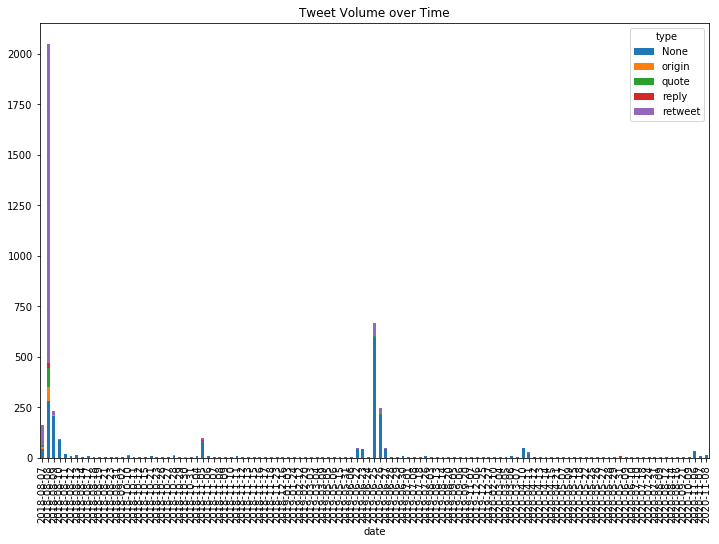

In [6]:
# Use log scale on Y axis
# x y plots instead of bar graph
# When you want to show cloud of points (summarize articles as x y plot in weird space, ex rise & decay)
# What are the interesting features on a per article basis
# SPike height, number of spikes, etc
# Probably generate a bunch of different metrics, most of which will be boring
# Each person can probably write somethign that generates a metrics
# Think about how to summarize articles as separate features.
# Use date published as a metric, (ex. time since patient 0)
# Term frequency inverse document frequency
# Exponent for exponential decay (coefficient of exponential decay)
grouped_df = time_tweet_df.groupby(["date", "type"]).count()["id"].unstack("type").fillna(0)
grouped_df.plot.bar(title="Tweet Volume over Time", figsize=(12,8), stacked=True);

In [ ]:
# day: 0
# hour: 1
# minute: 2
# second: 3
# month: 4

# assumes date col already given
def aggregate_by(df, factor_by=0):
    df_cols = set(df.columns.values.tolist())
    
    if 'date' not in df_cols:
        df["date"] = df.created_at.dt.date
    factor_cols = ['date', 'type']
    
    if factor_by == 1:
        if 'hour' not in df_cols:
            df["hour"] = df.created_at.dt.hour
        factor_cols.append('hour')
    elif factor_by == 2:
        if 'minute' not in df_cols:
            df["minute"] = df.created_at.dt.minute
        factor_cols.append('minute')
    elif factor_by == 3:
        if 'second' not in df_cols:
            df["second"] = df.created_at.dt.second
        factor_cols.append('second')
    elif factor_by == 4:
        if 'month' not in df_cols:
            df["month"] = df.created_at.dt.month
        factor_cols.append('month')
    
    grouped_df = df.groupby(factor_cols).count()["id"].unstack("type").fillna(0)
    grouped_df.plot.bar(title="Tweet Volume over Time", figsize=(12,8), stacked=True)
    

# aggregate_by(time_tweet_df, 2)

In [44]:
min_date = time_tweet_df.created_at.min().date()
max_date = time_tweet_df.created_at.max().date()
print((max_date - min_date).days)

date_range = np.array([min_date + timedelta(days=x) for x in range((max_date - min_date).days)])
id_by_date = time_tweet_df.groupby("date").count()["id"]
signal_df = pd.DataFrame({"date": date_range}).join(id_by_date, on="date").fillna(0)
signal_df.rename(columns = {'id':'tweet_count'}, inplace = True)
print(signal_df[signal_df.tweet_count == 0].date)
display(signal_df)

824
8      2018-08-15
9      2018-08-16
13     2018-08-20
15     2018-08-22
17     2018-08-24
          ...    
817    2020-11-01
818    2020-11-02
819    2020-11-03
820    2020-11-04
821    2020-11-05
Name: date, Length: 708, dtype: object


,date,tweet_count
0,2018-08-07,162.0
1,2018-08-08,2052.0
2,2018-08-09,230.0
3,2018-08-10,91.0
4,2018-08-11,20.0
...,...,...
819,2020-11-03,0.0
820,2020-11-04,0.0
821,2020-11-05,0.0
822,2020-11-06,31.0


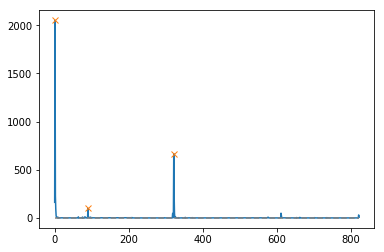

In [8]:
x = signal_df.tweet_count.to_numpy()
peaks, _ = find_peaks(x, height=50)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [18]:
for p in peaks:
    print(date_range[p])
    

all_peaks = []
for p in peaks:
    all_peaks.append((p, date_range[p]))

2018-08-08
2018-11-05
2019-06-25


array([[1, 90, 322],
       [datetime.date(2018, 8, 8), datetime.date(2018, 11, 5),
        datetime.date(2019, 6, 25)]], dtype=object)